<a href="https://colab.research.google.com/github/penguinlin777/data_processing/blob/main/220624-0311-2-1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# DanDan Requirements

2nd col -> 2nd maximum -> z

fig 1: x -> 4th col * 10 y -> 2nd

fig 2: x -> 1 / 开尔文(T) y -> 1 / z

fig 3: 拟合，GRG


In [2]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.signal import find_peaks, savgol_filter

# Read File
First, connect to google drive.

In [23]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [38]:
# file pre-processing
PRE_FILE_PATH = "/content/drive/MyDrive/data/20220624-0311-2-1" # change data floder path here
FILE_PATH = PRE_FILE_PATH + "/pre-processed"

if not os.path.exists(FILE_PATH):
  os.mkdir(FILE_PATH)

for file_name in os.listdir(PRE_FILE_PATH):
  if file_name == "pre-processed":
    continue
  with open(PRE_FILE_PATH + "/" + file_name, 'r') as fp:
    lines = fp.readlines()
  with open(FILE_PATH + "/" + file_name, 'w') as fp:
    for line in lines:
      if line[0] != '!':
        fp.write(line)

In [39]:
df_list = []
temp_list = []

def temp_convertor(center_degree):
  return center_degree + 273

for file_name in os.listdir(FILE_PATH):
  df = pd.read_csv(FILE_PATH + "/" + file_name, sep='\s+|\t| ', 
        header=None, error_bad_lines=False, skiprows=16)
  df = df.iloc[:, 0:4]
  shape_x, shape_y = df.shape
  if shape_y != 4:
    print("file name:" + file_name)
    raise Exception("Wrong file format")
  # print(file_name)
  # get temp from file name and convert to k
  temp = int(file_name[0:file_name.find('.')])  # change this line according to file name, python string processing
  converted_temp = temp_convertor(temp)
  temp_list.append(converted_temp)
  
  df_list.append(df)
  
def print_list(df_list, temp_list):
  for df, temp in zip(df_list, temp_list):
    print(temp)
    print(df.head(3))

In [40]:
# sort data base on temperature
def sort_data(x, y):
  xy = [(xi, yi) for xi, yi in zip(x, y)]
  sorted_xy = sorted(xy, key=lambda item: item[0])

  return [xi for xi, _ in sorted_xy], [yi for _, yi in sorted_xy]
temp_list, df_list = sort_data(temp_list, df_list)

print_list(df_list, temp_list)

393
       0          1          2         3
0  0.018  40.350777  27.872142  0.001280
1  0.019  49.169418  30.001746  0.001351
2  0.020  61.642284  32.501661  0.001422
403
       0          1          2         3
0  0.018  55.368694  32.649500  0.001280
1  0.019  60.911705  33.392534  0.001351
2  0.020  79.795174  36.978944  0.001422
413
       0          1          2         3
0  0.018  41.984848  28.430905  0.001280
1  0.019  52.662109  31.049036  0.001351
2  0.020  65.675041  33.547979  0.001422
423
       0          1          2         3
0  0.018  78.525215  38.882033  0.001280
1  0.019  83.082497  38.999027  0.001351
2  0.020  73.915390  35.590462  0.001422
433
       0          1          2         3
0  0.018  46.779381  30.010389  0.001280
1  0.019  54.921036  31.707964  0.001351
2  0.020  69.912910  34.613449  0.001422
443
       0          1          2         3
0  0.018  45.500793  29.597422  0.001280
1  0.019  47.201229  29.395148  0.001351
2  0.020  50.068806  29.292053  0

# Fig 1

x: 4th col * 10 

y: 2nd

[393, 403, 413, 423, 433, 443, 453, 463, 473, 483, 493, 503, 513, 523, 533, 543, 553]


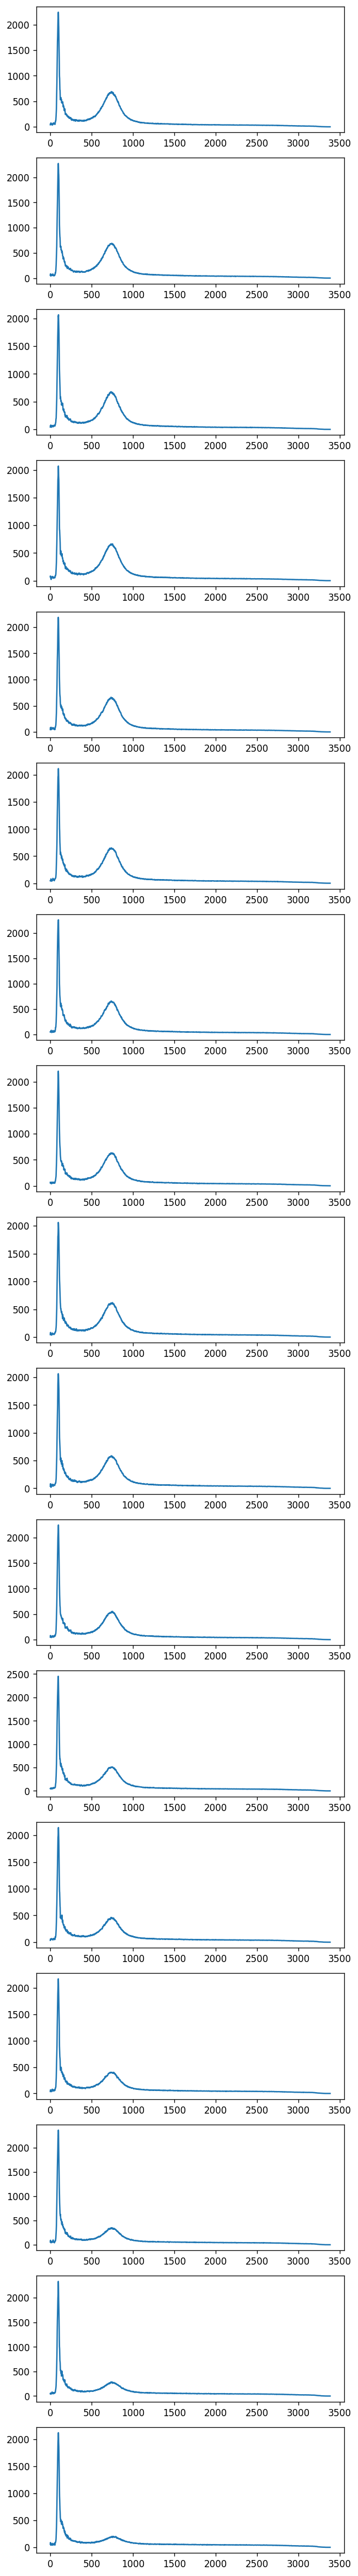

In [41]:
# sns.set()
sns.reset_orig()

# set figure size
plt.figure(figsize=(6, 3 * len(df_list)),dpi=120)

for i, df in enumerate(df_list):
  plt.subplot(len(df_list), 1, i + 1)
# plt.plot(df.iloc[:, 3] * 10, df.iloc[:, 1])   # Option 1: real x axis
  plt.plot(range(len(df.iloc[:, 1])), df.iloc[:, 1])  # Option 2: index
print(temp_list)

# Fig 2
Find second peaks with scipy

In [28]:
# Option1: scipy find_peaks

# second_peaks = []
# peaks_value = []

# for i, df in enumerate(df_list):
#   data = df.iloc[:, 1]
#   res, _ = find_peaks(data, height=500, distance=100)

#   if len(res) != 2:
#     raise Exception("Find peaks error, you need to adjust parameters in find_peaks")
#   second_peaks.append([res[1], data[res[1]]])
#   peaks_value.append(data[res[1]])

# print(second_peaks)

In [42]:
# Option 2: region maximum

REGION_START = 500
REGION_END = 1000

peaks_value = []

for df in df_list:
  data = df.iloc[:, 1]
  peaks_value.append(max(data[REGION_START:REGION_END]))

print(peaks_value)
print(temp_list)

[685.913208, 688.128784, 677.877625, 664.307434, 658.634949, 653.198914, 659.057312, 630.88623, 618.152344, 586.694336, 553.094055, 511.790222, 460.822205, 400.424377, 350.126373, 287.370239, 200.058334]
[393, 403, 413, 423, 433, 443, 453, 463, 473, 483, 493, 503, 513, 523, 533, 543, 553]


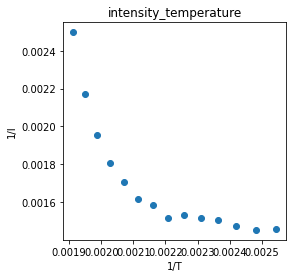

In [43]:
x = [1 / temp for temp in temp_list]
y = [1 / peak for peak in peaks_value]
x,y = sort_data(x, y)
# 画布大小 figsize, 清晰度 dpi
plt.figure(figsize=(4, 4))
# 图片标题 
plt.title('intensity_temperature')
# 轴标题
plt.xlabel('1/T')
plt.ylabel('1/I')

# print(temp_list, peaks_value)
plt.scatter(x[3:22], y[3:22], linewidth = 1.0, linestyle = '-')
plt.show()

# Fig 3

In [44]:
# linear regression

import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy import optimize
from scipy.optimize import leastsq

# x_fit = x[2:5]
# y_fit = y[2:5]
# z1 = np.polyfit(x_fit, y_fit, 1)
# p1 = np. poly1d(z1)
# y_fitted = p1(x_fit)
# plt.scatter(x_fit, y_fit)
# plt.plot(x_fit, y_fitted)
# plt.show
# res = st.linregress(x_fit, y_fit)
# plt.plot(x_fit, y_fit, 'o', label='original data')
# plt.plot(x_fit, res.intercept + res.slope*np.array(x_fit), 'r', label='fitted line')
# print(1/(res.intercept/((-1)*res.slope))-273)
# print(res.intercept)
# plt.legend()
# plt.figure(figsize=(4, 4),dpi=120)
# plt.scatter(x[:18],y[:18])
# plt.show()

# Fig 4

Fitting

Equations: @dandan

Objective:

The minimum of [the sum of least squares] for I_q_fit and I_q
note:

1. in dandan's case the subscript PMMA is PAGE
2. q is the forth column * 10
3. need rewrite: df.iloc[:, 3] * 10 is q; df.iloc[:, 1] is I_q
altering parameters (the last equation):
  - b_PS
  - b_PAGE
  - A_0
  - chi

Inputs: 
- M_w
- M_n
- M_n_PS
- a_1
- b_5
- m_S
- m_A
- rho_PS
- rho_PAGE
- v_nor = 118

Equation:
- w_PS = (m_S * b_5 / 5) / (m_A * a_1 + m_S * b_5 / 5)
- f_PS = w_PS / rho_PS / (w_PS / rho_PS + (1 - w_PS) / rho_PAGE)
- D_PS = D_PAGE = 1+(M_w / M_n - 1) / (w_PS ** 2 + (1 - w_PS))
- v_PS = m_S / rho_PS /  0.602
- v_PAGE = m_A / rho_PAGE / 0.602
- N_PS = v_PS * M_n_PS / v_nor / m_S
- N_PAGE = v_PAGE * (M_n - M_n_PS) / v_nor / m_A
- y_PS = N_PS * b_PS ** 2 * q ** 2 / 6
- y_PAGE = N_PAGE * b_PAGE ** 2 * q ** 2 / 6
- g1_PS = (1 - (y_PS * (D_PS - 1) + 1) ** ((D_PS - 1) ** -1)) / y_PS
- g1_PAGE = (1 - (y_PAGE * (D_PAGE - 1) + 1) ** ((D_PAGE - 1) ** -1)) / y_PAGE
- g2_PS = 2 * (-1 + y_PS + (y_PS * (D_PS - 1) + 1) ** ((D_PS - 1) ** -1)) / y_PS ** 2
- g2_PAGE = 2 * (-1 + y_PAGE + (y_PAGE * (D_PAGE - 1) + 1) ** ((D_PAGE -1) ** -1)) / y_PAGE ** 2
- rc = (v_PS * N_PS + v_PAGE * N_PAGE) / (v_PS * v_PAGE) ** 1/2
- s_PS_PS = rc * f_PS ** 2 * g2_PS
- s_PAGE_PAGE = rc * (1 - f_PS) ** 2 * g2_PS
- s_PS_PAGE = rc * f_PS * (1 - f_PS) * g1_PS * g1_PAGE
- S_q = s_PS_PS + 2 * s_PS_PAGE + s_PAGE_PAGE
- W_q = s_PS_PS * s_PAGE_PAGE - s_PS_PAGE ** 2
- I_q_fit = A_0 / (S_q / W_q - 2 * chi)

# Fig 5

Gaussian fitting of second peak in Fig 1

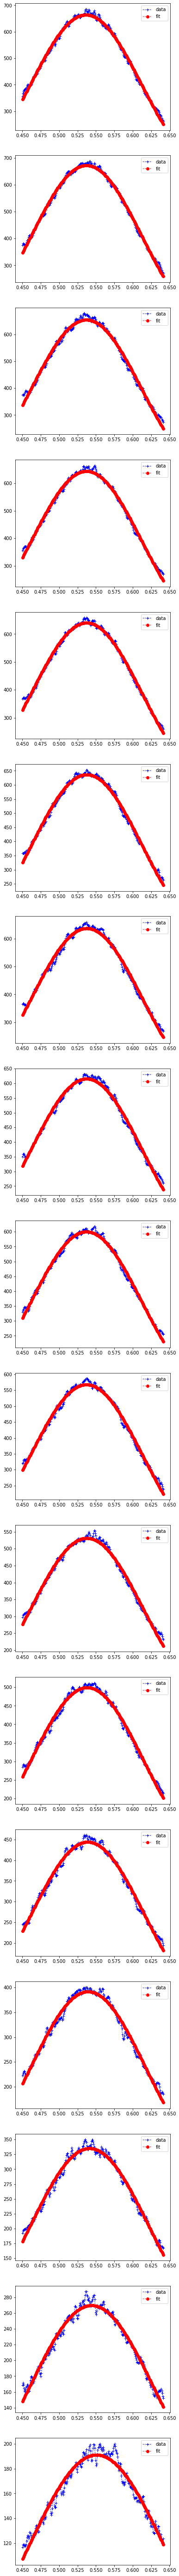

In [94]:
from scipy.optimize import curve_fit
import warnings
import numpy as np

warnings.filterwarnings('ignore')

START_REGION = 615
END_REGION  = 885

def gaus(x, a, x0, sigma):
  return a * (1/(sigma * (np.sqrt(2*np.pi)))) *np.exp(-(x - x0)**2 / (2 * sigma**2))

plt.figure(figsize=(6, 6 * len(df_list)))

fit_opt = []  # fitting parameters

for i, df in enumerate(df_list):
  plt.subplot(len(df_list), 1, i + 1)
  x = df.iloc[START_REGION: END_REGION, 3] * 10
  y = df.iloc[START_REGION: END_REGION, 1]

  n = len(x)                    
  mean = sum(x * y) / sum(y)
  sigma = np.sqrt(sum(y * (x - mean)**2) / sum(y))

  popt, pcov = curve_fit(gaus, x, y, p0=[1, mean, sigma])
  fit_opt.append(popt)
  # popt是优化之后的三个参数，直接带入gauss使用
  plt.plot(x, y, 'b+:', label='data')
  plt.plot(x, gaus(x, *popt), 'ro:', label='fit')
  plt.legend()

FWHM:0.17734
FWHM:0.17787
FWHM:0.17739
FWHM:0.17689
FWHM:0.17722
FWHM:0.17743
FWHM:0.17765
FWHM:0.17847
FWHM:0.17775
FWHM:0.18035
FWHM:0.18049
FWHM:0.18039
FWHM:0.18107
FWHM:0.18515
FWHM:0.19098
FWHM:0.20159
FWHM:0.21986


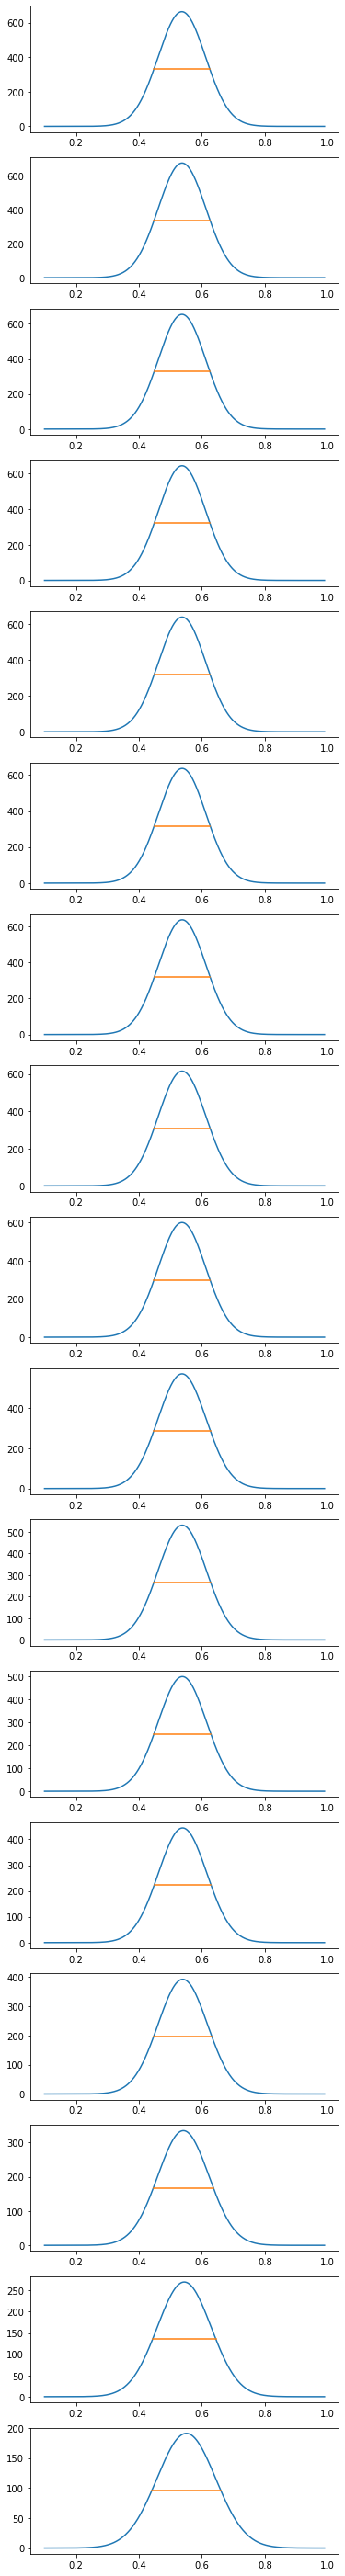

In [95]:
# 峰值的半峰宽度
def peak(x, c):
  return np.exp(-np.power(x - c, 2) / 16.0)

def lin_interp(x, y, i, half):
  return x[i] + (x[i+1] - x[i]) * ((half - y[i]) / (y[i+1] - y[i]))

def half_max_x(x, y):
  half = (max(y) - min(y)) / 2.0
  signs = np.sign(np.add(y, -half))
  zero_crossings = (signs[0:-2] != signs[1:-1])
  zero_crossings_i = np.where(zero_crossings)[0]
  
  if len(zero_crossings_i) != 2:
    raise Exception("You should check START_GEN and END_GEN")
  
  return [lin_interp(x, y, zero_crossings_i[0], half), lin_interp(x, y, zero_crossings_i[1], half)]

START_GEN = 0.1   # region start and end
END_GEN = 0.99
hw_result = []    # store result

plt.figure(figsize=(6, 3 * len(df_list)))

for i, opt in enumerate(fit_opt):
  x = np.linspace(START_GEN, END_GEN, 1000)
  y = gaus(x, *opt)

  # find the two crossing points
  hmx = half_max_x(x, y)

  # print the answer
  fwhm = hmx[1] - hmx[0]
  hw_result.append(fwhm)
  print("FWHM:{:.5f}".format(fwhm))

  # a convincing plot
  half = max(y) / 2.0

  # plot
  plt.subplot(len(df_list), 1, i + 1)
  plt.plot(x, y)
  plt.plot(hmx, [half, half])

# Fig 6

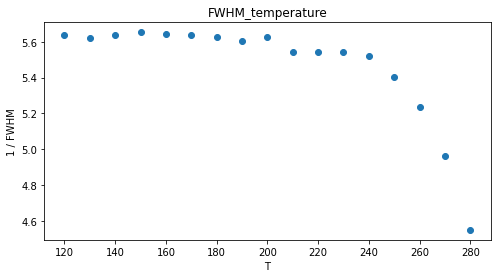

            0
5.642828  160
5.635994  170
5.629186  180
5.603297  190
5.625954  200
5.544690  210
5.540605  220
5.543455  230
5.522876  240
5.401049  250
5.236190  260
4.960514  270
4.548437  280


In [96]:
from tabulate import tabulate

x = [temp - 273 for temp in temp_list]
y = [1 / hw for hw in hw_result]

x, y = sort_data(x, y)

# 画布大小 figsize, 清晰度 dpi
plt.figure(figsize=(8, 4))
# 图片标题 
plt.title('FWHM_temperature')
# 轴标题
plt.xlabel('T')
plt.ylabel('1 / FWHM')
# 画布粗细和刻度
plt.scatter(x[0:], y[0:], linewidth = 1.0, linestyle = '-')
plt.show()
df = pd.DataFrame(x[4:],y[4:])
print(df)

# Fig 7

x = 251.79849876640785, y = 5.540953411857805


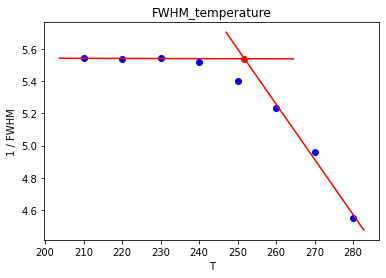

In [101]:
import numpy as np
import sympy

x_fit1 = x[9:12]
y_fit1 = y[9:12]

res1 = st.linregress(x_fit1, y_fit1)
# plt.scatter(x_fit1, y_fit1, color='b', label='original data')
x_fitted1 = np.linspace(0.97 * x_fit1[0], 1.15 * x_fit1[len(x_fit1) - 1], 20)   # x coordination
plt.plot(x_fitted1, res1.intercept + res1.slope*np.array(x_fitted1), 'r', label='fitted line')

x_fit2 = x[14:]
y_fit2 = y[14:]
res2 = st.linregress(x_fit2, y_fit2)
# plt.scatter(x_fit2, y_fit2, color='b', label='original data')
x_fitted2 = np.linspace(0.95 * x_fit2[0], 1.01 * x_fit2[len(x_fit2) - 1], 20)   # x coordination
plt.plot(x_fitted2, res2.intercept + res2.slope*np.array(x_fitted2), 'r', label='fitted line')

# cal intersection
inter_x = (res1.intercept - res2.intercept) / (res2.slope - res1.slope)
inter_y = res2.intercept + res2.slope * inter_x
plt.scatter(inter_x, inter_y, color='r')
# plt.figure(figsize=(6, 4),dpi=200)

# 图片标题 
plt.title('FWHM_temperature')
# 轴标题
plt.xlabel('T')
plt.ylabel('1 / FWHM')
plt.scatter(x[9:], y[9:], color='b', linewidth = 1.0, linestyle = '-')
print(f'x = {inter_x}, y = {inter_y}')

In [103]:
import numpy as np
# define a fitting function
# including 自变量x, 振幅amplitude, 对称中心center, 标准差sigma 
# 该表达式是一个带振幅值amplitude的高斯函数表达式
def_1gaussian(x, amp1, cen1, sigma1)
  return amp1*(1/(sigma1*(np.sqrt(2*np.pi))))*(np.exp((-1.0/2.0)*(((x_array-cen1)/sigma1)**2)))


IndentationError: ignored